# Simple Linear Regression – Mathematical Derivation & Coding From Scratch

---

## 1️⃣ Linear Regression Overview

Simple Linear Regression is a **supervised machine learning algorithm** used to model the relationship between:

- One independent variable (**X**)
- One dependent variable (**Y**)

The goal is to find the **best-fit line** that minimizes the error between predicted and actual values.

### Linear Equation:

Y = mX + b

Where:
- **m** → Slope (weight)
- **b** → Intercept (bias)
- **Y** → Predicted value
- **X** → Input feature

---

## 2️⃣ Objective: Minimize Error

We want to minimize the total prediction error.

### Error for one point:

Error = (Y_actual - Y_predicted)

### Loss Function (Total Error):

We use **Mean Squared Error (MSE)**:

L = Σ (Y - Ŷ)²

Why square the error?

- Removes negative signs
- Penalizes larger errors more
- Makes optimization mathematically smooth

---

## 3️⃣ Methods to Find m and b

There are two main approaches:

---

### ✅ 1. Closed-Form Solution (Ordinary Least Squares - OLS)

This method directly calculates m and b using derived formulas.

Used in:
- `sklearn.linear_model.LinearRegression`

Works well when:
- Data dimension is small
- Computation is manageable

---

### ✅ 2. Non-Closed-Form Solution (Gradient Descent)

This is an iterative optimization method.

Used in:
- `SGDRegressor`

Useful when:
- High dimensional data
- Direct formula is computationally expensive

Gradient Descent gradually updates m and b to minimize loss.

---

## 4️⃣ Mathematical Derivation of m and b (OLS)

We minimize:

L = Σ (Y - (mX + b))²

To find minimum:
- Take partial derivative with respect to m
- Take partial derivative with respect to b
- Set both equal to 0

---

### 🔹 Derived Formula for b:

b = Ȳ - mX̄

Where:
- Ȳ → Mean of Y
- X̄ → Mean of X

---

### 🔹 Derived Formula for m:

m = Σ (Xi - X̄)(Yi - Ȳ) / Σ (Xi - X̄)²

This represents:

Covariance(X, Y) / Variance(X)

Interpretation:
- Measures how strongly X and Y move together
- Normalizes by spread of X

---

## 5️⃣ Coding Linear Regression From Scratch

We implement a custom class.

---

### Python Implementation

```python
import numpy as np

class MyLinearRegression:
    
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)
        
        X_mean = np.mean(X)
        Y_mean = np.mean(Y)
        
        numerator = np.sum((X - X_mean) * (Y - Y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        
        self.m = numerator / denominator
        self.b = Y_mean - self.m * X_mean
    
    def predict(self, X):
        X = np.array(X)
        return self.m * X + self.b


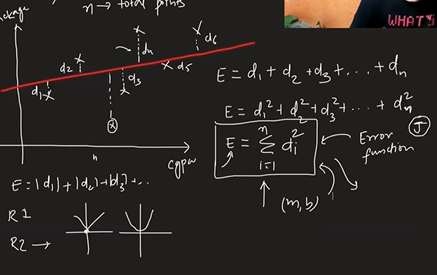

- E means error
- have to minimize the error
- doing sqaure rather than simply writting d as points can be present in both direction of line so some points it will +ve and for some it will be -ve
- then why not modulus as we have to differentiate and mode is not differenciable 
- then why not tow be power 4, 8 as 2 is enough



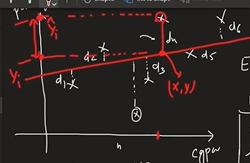
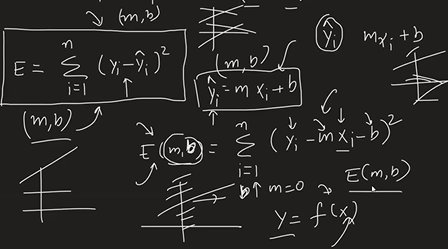

- find m and b such a way to minimize E
- yi^ =mxi +b 
- we can change a line by changing either y intercept or slope

## m fixed
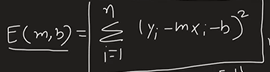

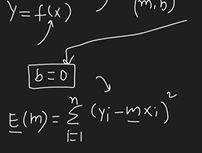

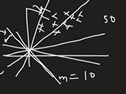

- m is fixed , m=1
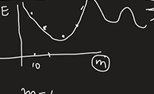



## b fixed

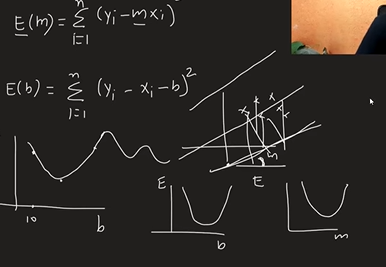

# E v/s M v/s B
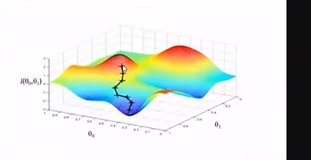

# Solving m and b for minimum error
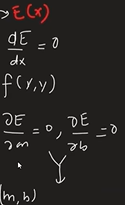

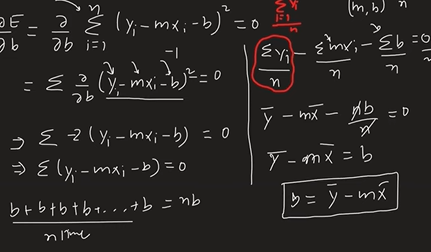

### m value
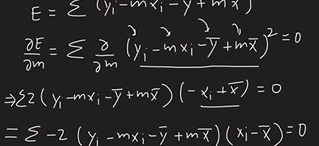
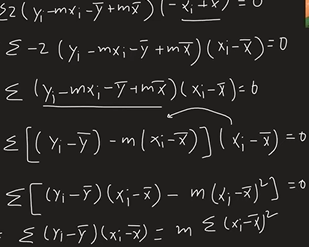
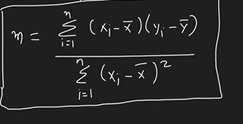


In [16]:
class LR:

    def __init__(self):
        self.m = None
        self.b = None
    def fit(self, X, Y):
        num=0
        den=0
        for i in range(X.shape[0]):
            num+=(X[i]-X.mean())*(Y[i]-Y.mean())
            den+=(X[i]-X.mean())**2
        self.m=num/den
        self.b=Y.mean() - self.m*X.mean()
        print(self.m,self.b)
    def predict(self, X):
        return self.m*X + self.b


In [17]:
import numpy as np
import pandas as pd    

In [18]:
df=pd.read_csv('placement.csv')

In [19]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [20]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [21]:
X

array([[6.89],
       [5.12],
       [7.82],
       [7.42],
       [6.94],
       [7.89],
       [6.73],
       [6.75],
       [6.09],
       [8.31],
       [5.32],
       [6.61],
       [8.94],
       [6.93],
       [7.73],
       [7.25],
       [6.84],
       [5.38],
       [6.94],
       [7.48],
       [7.28],
       [6.85],
       [6.14],
       [6.19],
       [6.53],
       [7.28],
       [8.31],
       [5.42],
       [5.94],
       [7.15],
       [7.36],
       [8.1 ],
       [6.96],
       [6.35],
       [7.34],
       [6.87],
       [5.99],
       [5.9 ],
       [8.62],
       [7.43],
       [9.38],
       [6.89],
       [5.95],
       [7.66],
       [5.09],
       [7.87],
       [6.07],
       [5.84],
       [8.63],
       [8.87],
       [9.58],
       [9.26],
       [8.37],
       [6.47],
       [6.86],
       [8.2 ],
       [5.84],
       [6.6 ],
       [6.92],
       [7.56],
       [5.61],
       [5.48],
       [6.34],
       [9.16],
       [7.36],
       [7.6 ],
       [5.

In [22]:
Y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
lr=LR()
lr.fit(X_train,Y_train)

[0.55795197] [-0.89611192]


In [25]:
X_test[0]

array([8.58])

In [26]:
lr.predict(X_test[0])

array([3.89111601])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [29]:
y_pred=lr.predict(X_test)

In [31]:
print(mean_absolute_error(Y_test,y_pred))
print(mean_squared_error(Y_test,y_pred))
print(r2_score(Y_test,y_pred))
print(np.sqrt(mean_squared_error(Y_test,y_pred)))


0.2884710931878174
0.12129235313495523
0.7807301475103842
0.3482705171773161
